<a href="https://colab.research.google.com/github/5jisoo/ML-DL-Study/blob/main/Chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap 02. 데이터 다루기


## 02-1. 훈련 세트와 테스트 세트

### 훈련 세트와 테스트 세트
- 테스트 세트: 평가에 사용하는 데이터
- 훈련 세트: 훈련에 사용되는 데이터

이전엔 테스트 세트와 훈련 세트를 구분하지 않았음 --> 당연히 100%의 정확도가 나옴.

이번엔 구분할 예정.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [ ]:
# import 해주기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
# 훈련 세트 - 35개
train_input = fish_data[:35]
train_target = fish_target[:35]


# 테스트 세트 - 14개
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn.fit(train_input, train_target) # 학습
kn.score(test_input, test_target) # test - [문제] 평가 점수 - 0.0....!!!!!! 

0.0

### 샘플링 편향

문제? ==> 훈련 세트에는 빙어가 하나도 들어가있지 않고, 
테스트세트에는 빙어만 있다는 것..!!

훈련 세트와 테스트 세트를 나누려면 도미와 빙어가 골고루 섞이게 해라!

<br>

샘플링이 한쪽으로 치우쳐진 상태임. == **샘플링 편향**!!

### 넘파이

파이썬 배열 라이브러리.

고차원의 배열을 손쉽게 만들고 조작할 수 있도록 한다!

In [ ]:
# 넘파이 라이브러리 임포트
import numpy as np

In [ ]:
# 파이썬 리스트를 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr # 확인하기

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


훈련 세트와 테스트 세트를 마구잡이로 섞어주어야 함.

근데 각각의 인덱스를 기억하는 건 어려움

차라리 인덱스를 섞은 다음, input_arr와 target_arr에서 각각 샘플을 선택하도록 하자!


---



- 넘파이의 arange(n) 함수 : 0부터 n-1까지 1씩 증가하는 인덱스를 만들 수 있음.

- shuffle()을 사용하여 데이터를 섞어줌.
  - 책과 동일한 결과를 얻기 위해 랜덤 시드를 미리 설정함. 

In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index # 확인

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

넘파이의 배열 인덱싱 기능 사용하기
- 여러 개의 인덱스로 한 번에 어러 개의 원소를 선택할 수 있게 함.
- 리스트 대신 넘파이 배열을 인덱스로 전달해줌.

In [ ]:
# 확인
print(input_arr[[1,3]]) # 배열 인덱싱
print(index[:35])

# 훈련 세트 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 테스트 세트 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[[ 26.3 290. ]
 [ 29.  363. ]]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2]


!! 참고 !!
- 2차원 배열의 행과 열 인덱스를 콤마(,)로 나누어 지정함
  - ex) 1번째 행, 0번째 열 ==> array[1, 0]
- 슬라이싱 연산자를 통해 처음부터 마지막 원소까지 모두 선택? 시작, 종료 인덱스 모두 생략 가능함.
  - ex) 모든 행의 0번째 열 ==> array[:, 0]

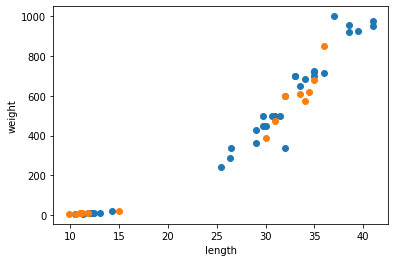

In [ ]:
# 테스트 세트가 잘 섞였는지 확인

import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 두 번째 머신러닝 프로그램

앞에서 만든 훈련, 테스트 세트로 k-최근접 이웃 모델을 훈련, 테스트 해보자`!

In [ ]:
kn.fit(train_input, train_target) # 훈련
kn.score(test_input, test_target) # test - 1.0 ==> good!~

1.0

In [ ]:
# 예측 결과와 실제 타깃 비교해보기

kn.predict(test_input)  # 예측 결과

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target # 실제 결과

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

예측 결과와 실제 결과가 동일하고, 둘다 array() 배열로 감싸져있음!

--> 둘다 넘파이 배열임!

사실 사이킷런 모델의 입력과 출력은 모두 **넘파이 배열**이다!

샘플링 편향된 예시 test: 0.0


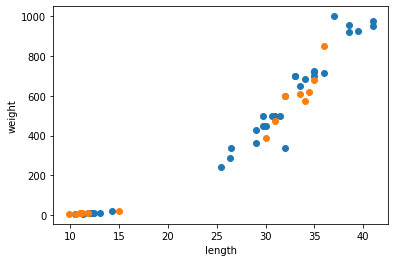

데이터 세트를 잘 섞은 뒤의 test: 1.0


In [ ]:
''' 전체 코드 확인하기 '''

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

# 사이킷런 임포트
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()


''' 샘플링 편향된 예시 '''
# 훈련 세트 - 35개
train_input = fish_data[:35]
train_target = fish_target[:35]


# 테스트 세트 - 14개
test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target) # 학습
print("샘플링 편향된 예시 test:", kn.score(test_input, test_target)) # test - [문제] 평가 점수 - 0.0....!!!!!! 


''' 넘파이 라이브러리를 사용하여 샘플링 편향 해소해주기 '''
# 넘파이 라이브러리 임포트
import numpy as np

# 파이썬 리스트를 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 훈련과 테스트 세트를 섞어주기 위해 --> index를 섞어줌
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

# 훈련 세트 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 테스트 세트 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


''' 테스트 세트가 잘 섞였는지 확인하기 '''
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 훈련, 테스트
kn.fit(train_input, train_target) # 훈련
print("데이터 세트를 잘 섞은 뒤의 test:", kn.score(test_input, test_target)) # test - 1.0 ==> good!~




---


## 02-2. 데이터 전처리

올바른 결과 도출을 위해 데이터를 사용하기 전 데이터 전처리 과정을 거쳐야 한다!

### 넘파이로 데이터 준비하기


In [100]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

생선 데이터 준비하기
- column_stack() 함수: 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결함.
  - 연결할 리스트는 파이썬 tuple로 전달.

In [101]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

```[1,2,3]``` 과 ```[4,5,6]``` 두 리스트를 일렬로 세운 다음 나란히 옆으로 붙인 걸 확인할 수 있음.

```python
array([[1, 4],
       [2, 5],
       [3, 6]])
```

In [102]:
import numpy as np

# fish_length와 fish_weight 데이터를 일렬로 세워서 나란히 옆으로 붙여줌.
fish_data = np.column_stack((fish_length, fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


타깃 데이터 만들기

- np.ones(): 1을 채운 배열을 만듦.
- np.zeros(): 0을 채운 배열을 만듦.

In [81]:
# 예시 확인하기
print(np.ones(5))

[1. 1. 1. 1. 1.]


- np.concatenate(): 두 배열을 연결해줌.

In [103]:
# 타깃 데이터 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런으로 훈련 세트와 테스트 세트 나누기

전처럼 인덱스를 직접 섞지말고 세련된 방법을 사용해보자!

- train_test_split(): 전달되는 리스트나 배열을 알아서 섞어서, 비율에 맞게 훈련 세트와 테스트 세트로 나누어줌.
  - model_selection 모듈 아래에 있음.

In [104]:
# model_selection 모듈 import 해주기

from sklearn.model_selection import train_test_split

- 사용법
  - 나누고 싶은 리스트 or 배열을 원하는 만큼 전달하면 됨.
  - 랜덤 시드 설정: random_state 매개변수 사용
- return값
  - 훈련용 입력 데이터, 테스트용 입력 데이터, 훈련용 정답 데이터, 테스트용 정답 데이터
- 기본값
  - 25%를 테스트 세트로 떼어냄.

In [105]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

- 샘플링 편향 방지 기능
  - stratify 매개변수에 타깃 데이터를 전달> 각 세트에 샘플의 클래스 비율이 일정하도록 데이터를 나눔.

In [106]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target,random_state=42)

### 수상한 도미 한마리

k- 최근접 이웃을 훈련해보자.

In [107]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 1.0

1.0

새로운 도미 데이터를 넣어서 결과를 확인해보자

`[[25, 150]]`

In [108]:
kn.predict([[25, 150]]) # 0..... 빙어라고 나옴.

array([0.])

0이 출력됨. >> 빙어라고 예측이 됨..!

데이터를 시각적으로 다시 확인해보자.

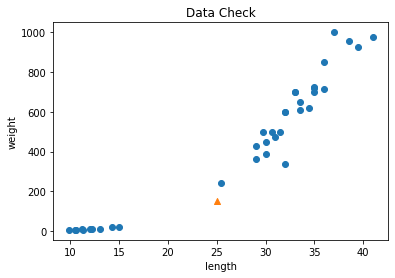

In [109]:
import matplotlib.pyplot as plt

plt.title("Data Check")
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")  # marker는 모양을 지정함.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

분명 샘플은 도미 데이터에 더 가까움.

k-최근접 이웃 방법에 따라, 샘플에서 가장 가까운 5개의 이웃 샘플을 다시 그려서 확인해보자.

- kneighbors(): 이웃까지의 거리, 이웃 샘플의 인덱스를 반환


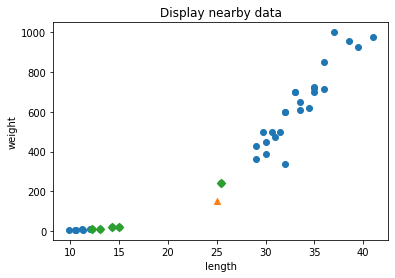

In [110]:
distances, indexes = kn.kneighbors([[25, 150]]) # 샘플에서 가까운 이웃들의 거리, 인덱스를 저장

plt.title("Display nearby data")
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [111]:
# 직접 데이터 확인하기
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


위의 그래프에서는 x축의 범위가 좁고, y축의 범위가 넓음.
> 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산이 되는 것!

<br>

눈으로 더 명확히 확인해보자. :: x축의 범위를 동일하게 0~1,000으로 맞추어 보자

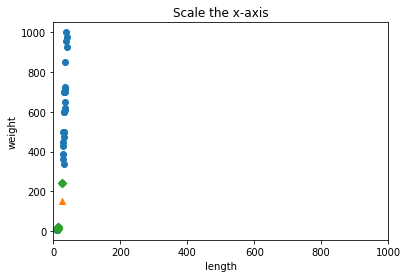

In [112]:
plt.title("Scale the x-axis")
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000)) # 범위 설정하기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이런 데이터라면? x축(length)은 데이터 판단에 크게 영향을 끼치지 못함. 

오로지 y축인 생선의 무게(weight)만 고려 대상이 되는 것!

> 두 특성(길이와 무게)의 값이 놓인 범위가 매우 상이함. <br>
> 즉, 두 특성의 스케일이 다름.

<br>

데이터를 표현하는 기준이 다르다면 특히 거리 기반 알고리즘의 예측 정확도가 떨어짐.

k-최근접 이웃 역시도 거리 기반 ==>  정확도가 떨어짐.

> 특성값을 일정한 기준으로 맞춰 주어야 함. <br>
> 이러한 작업이 데이터 전처리.

가장 널리 사용하는 전처리 방법: **표준 점수(z 점수)**


- 표준점수: 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄.
  - 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능.

- np.mean(): 평균 계산
- np.std() : 표준편차 계산
  - 평균과 표준편차는 각 특성별로 계산해야 하므로 axis= 0으로 지정함.
  - axis=0? 각 열의 통계값을 계산함.

In [113]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


표준 점수 변환
- (원본데이터 - 평균) / 표준편차

<br>

밑의 식의 원리?
- 넘파이는 train_input의 모든 행의 각 특성들에 계산을 적용함.
  - mean에 들어있는 각 특성들의 평균값을 빼주고 
  - std에 있는 각각의 표준편차를 나눈다.

In [114]:
train_scaled = (train_input - mean) / std

print(train_input)
print(train_scaled)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.1705

### 전처리 데이터로 모델 훈련하기

샘플 데이터 역시도 동일한 비율로 변환을 시켜주어야 함.

- 중요한 점
  - 샘플 데이터 변환은 **훈련 세트**의 mean, std를 이용하여 변환해야 함.

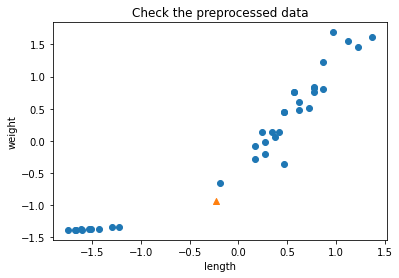

In [115]:
new = ([25, 150] - mean) / std  # 샘플 데이터 변환

plt.title("Check the preprocessed data")
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

앞서 표준편차 변환 전 산점도와 거의 동일해짐.
달라진 점?
- x축과 y축의 **범위가 동일**해졌다는 점!!

<br>

새로운 데이터셋으로 훈련을 시켜보자.

In [116]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [117]:
test_scaled = (test_input - mean) / std   # 테스트 스케일 변환
kn.score(test_scaled, test_target)

1.0

In [118]:
# 샘플을 이용하여 모델 예측해보기
kn.predict([new])

array([1.])

가까운 이웃 데이터의 변화 확인해보기

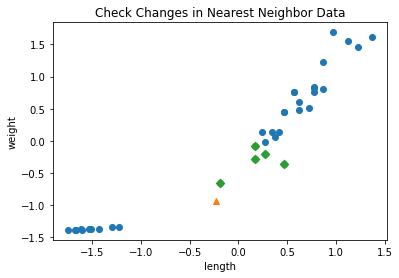

In [119]:
distances, indexes = kn.kneighbors([new])

plt.title("Check Changes in Nearest Neighbor Data")
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 전체 코드 확인하기

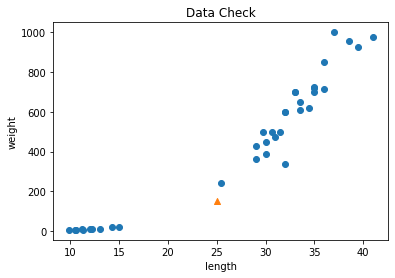

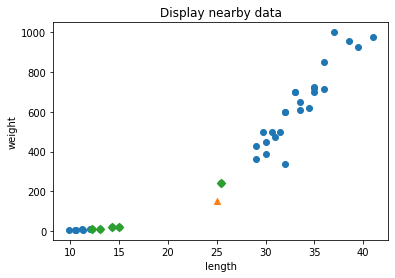

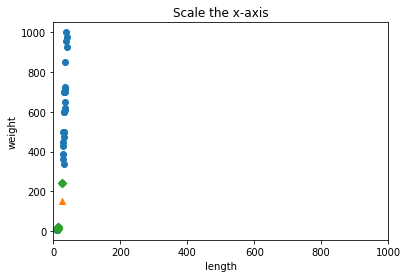

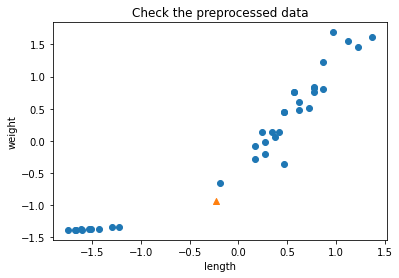

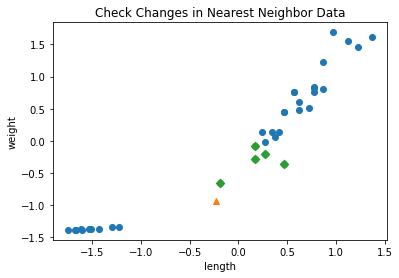

In [120]:
'''전체 코드 확인하기'''


'''넘파이로 데이터 준비하기'''

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

# fish_length와 fish_weight 데이터를 일렬로 세워서 나란히 옆으로 붙여줌.
fish_data = np.column_stack((fish_length, fish_weight))

# 타깃 데이터 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))


'''사이킷런으로 훈련 세트와 테스트 세트 나누기'''

# model_selection 모듈 import 해주기
from sklearn.model_selection import train_test_split

# 샘플링 편향 방지
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target,random_state=42)


'''수상한 도미 한마리의 데이터'''

# k-최근접 이웃 모델 훈련하기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 1.0

# 새로운 도미 데이터
kn.predict([[25, 150]]) # 0..... 빙어라고 나옴.

# 데이터 확인해보기
import matplotlib.pyplot as plt

plt.title("Data Check")
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")  # marker는 모양을 지정함.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 가까운 데이터 확인해보기
distances, indexes = kn.kneighbors([[25, 150]]) # 샘플에서 가까운 이웃들의 거리, 인덱스를 저장

plt.title("Display nearby data")
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# x축의 범위를 다시 0~1000으로 조정
plt.title("Scale the x-axis")
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000)) # 범위 설정하기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 표준 점수 활용하여 데이터 전처리하기
mean = np.mean(train_input, axis=0)	# 평균
std = np.std(train_input, axis=0)	# 표준편차

# train set 범위 조정
train_scaled = (train_input - mean) / std

# 전처리 데이터 확인하기
new = ([25, 150] - mean) / std  # 샘플 데이터 변환

plt.title("Check the preprocessed data")
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 새로운 데이터셋으로 훈련하기
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std   # 테스트 스케일 변환
kn.score(test_scaled, test_target)	# 1.0

# 샘플을 이용하여 모델 예측해보기
kn.predict([new])	# 1. > 도미! 예측 성공

# 가까운 이웃 데이터의 변화 확인하기
distances, indexes = kn.kneighbors([new])

plt.title("Check Changes in Nearest Neighbor Data")
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
